In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [4]:
X=df[['enginesize','horsepower','citympg','highwaympg']]
Y=df['price']

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
#feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
#train model
model=LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [9]:
#prediction
Y_pred=model.predict(X_test_scaled)

In [10]:
print("Name:Suwasthika V")
print("Reg. No:212225040445")
print("MODEL COEFFICIENTS:")
for feature,coef in zip(X.columns,model.coef_):
    print(f"{feature:>12}: {coef:>10}")
print(f"{'Intercept':>12}: {model.intercept_:>10}")

Name:Suwasthika V
Reg. No:212225040445
MODEL COEFFICIENTS:
  enginesize: 4523.404901011966
  horsepower: 1694.2232554525806
     citympg: -392.5731841571549
  highwaympg: -816.3577991826088
   Intercept: 13223.414634146342


In [11]:
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':>12}: {mean_squared_error(Y_test,Y_pred):>10}")
print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(Y_test,Y_pred)):>10}")
print(f"{'R-squared':>12}: {r2_score(Y_test,Y_pred):10}")
print(f"{'MAE':>12}: {mean_absolute_error(Y_test,Y_pred):10}")


MODEL PERFORMANCE:
         MSE: 16471505.900042146
        RMSE: 4058.5103055237087
   R-squared: 0.7913520781370976
         MAE: 2892.628134137953


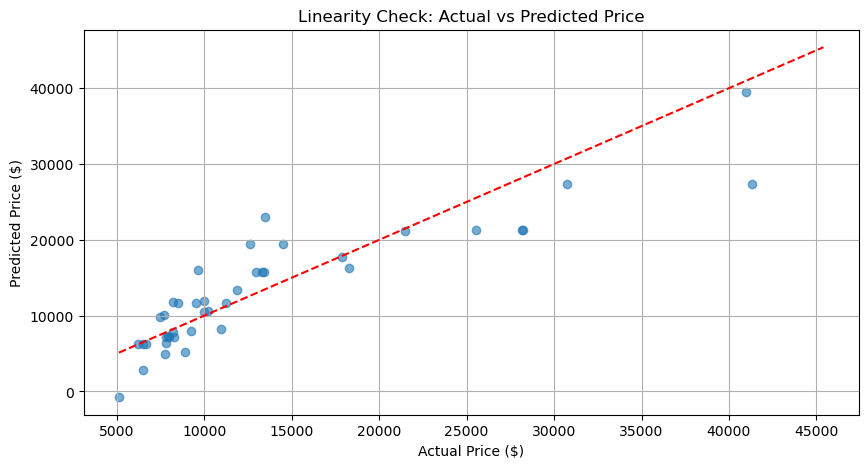

In [12]:
# linearity check
plt.figure(figsize=(10,5))
plt.scatter(Y_test,Y_pred,alpha=0.6)
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--')
plt.title("Linearity Check: Actual vs Predicted Price")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

In [13]:
# Independence (Durbin-watson)
residuals=Y_test-Y_pred
dw_test=sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson statistic: {dw_test:.2f}",
      "\n(Values close to 2 indicates no autocorrelation)")


Durbin-Watson statistic: 2.28 
(Values close to 2 indicates no autocorrelation)


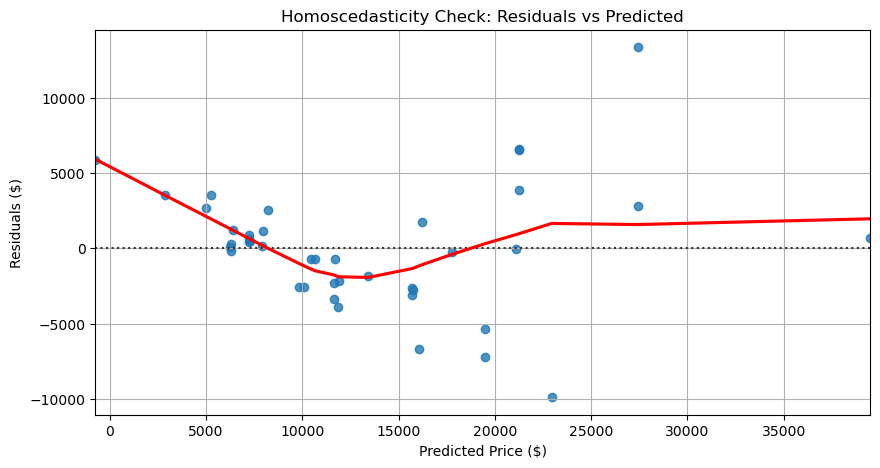

In [16]:
# Homoscedasticity
plt.figure(figsize=(10,5))
sns.residplot(x=Y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

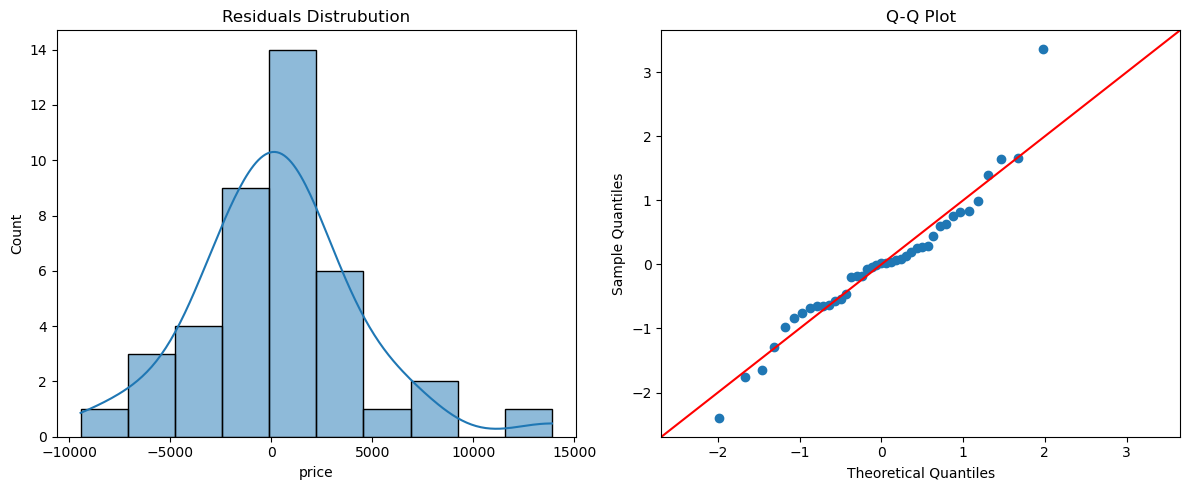

In [18]:
# Normality of residuals
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals,kde=True,ax=ax1)
ax1.set_title("Residuals Distrubution")
sm.qqplot(residuals,line='45',fit=True,ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()